In [16]:
import numpy as np
from scipy.fftpack import fft, ifft
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

# Problem 1

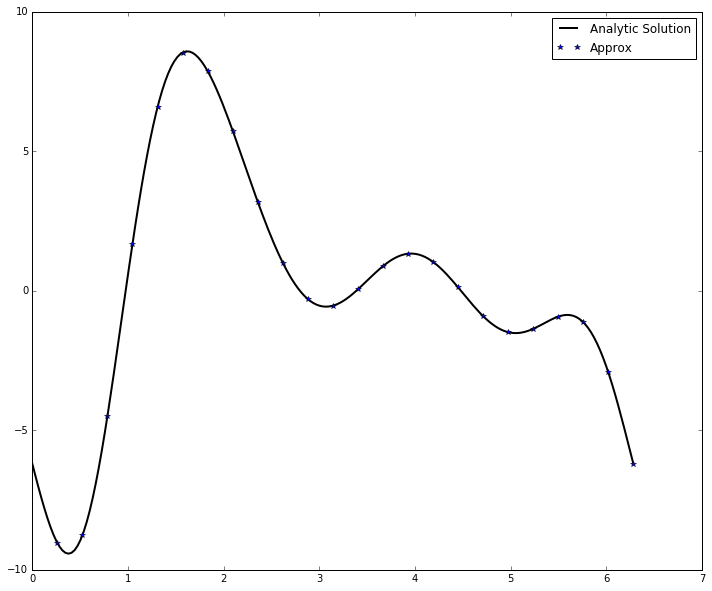

In [13]:
N = 24
x1 = (2.*np.pi/N)*np.arange(1,N+1)
u = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate((np.arange(0,N/2), np.array([0]), np.arange(-N/2 + 1,0,1)))

u_hat = fft(u)
up_hat = ((1j*k)*u_hat)
up = np.real(ifft(up_hat))

upp_hat = (-k**2 * u_hat)
upp = np.real(ifft(upp_hat))

x2 = np.linspace(0,2*np.pi,200)
Ux = lambda x: 2.*np.sin(x)*np.cos(x)**2 - np.sin(x)**3 \
                + 2.*np.cos(x+1)*np.exp(2*np.sin(x+1))
Uxx = lambda x: 2*np.cos(x)**3 - 7*np.sin(x)**2*np.cos(x) \
                + 4*np.cos(x+1)**2*np.exp(2*np.sin(x+1)) \
                - 2.*np.sin(x+1)*np.exp(2*np.sin(x+1))
analytic_solution = .5*Uxx(x2) - Ux(x2)

fig = plt.figure(figsize=(12,10))
plt.plot(x2,analytic_solution,'-k',lw=2.,label='Analytic Solution')
plt.plot(x1, .5*upp - up, '*b', label='Approx')
plt.legend()
plt.show()

# Problem 2

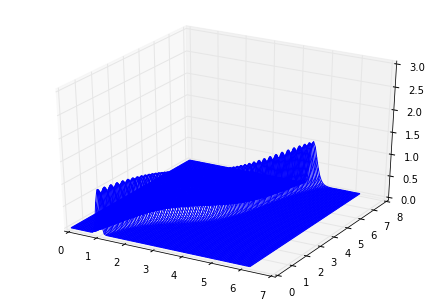

In [19]:
# ut + c(x)ux = 0
c = lambda x: .2 + np.sin(x-1)**2
u0 = lambda x, t: np.exp(-100*(x-1)**2)
t_steps = 150
t_domain = np.linspace(0,8.,t_steps)
x_steps = 100
N = 100
x_domain = np.linspace(0,2.*np.pi,x_steps, endpoint=False)

k2 = np.concatenate((np.arange(0,N/2), np.array([2]), np.arange(-N/2 + 1, 0, 1)))

U = np.array([u0(x,0) for x in x_domain])

func = lambda u, t: -c(x_domain) * np.real(ifft((1j*k2*fft(u))))

sol = odeint(func, U, t_domain)

X,Y = np.meshgrid(x_domain, t_domain)
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,sol)
ax.set_zlim(0,3)
plt.show()